In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns

In [2]:
df_init=pd.read_csv('initial.csv')
df_init.drop(columns=['Unnamed: 0'],inplace=True)
df_init['DATE']=pd.to_datetime(df_init['DATE'])
df_init.head()

,CAMIS,DATE,SCORE,INSPECTION TYPE,02A,02B,02C,02D,02E,02F,...,10D,10E,10F,10G,10H,10I,10J,ACTION,CRITICAL FLAG,GRADE
0,30075445,2017-05-18,7.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A
1,30075445,2018-05-11,5.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,0,A
2,30075445,2019-05-16,14.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,B
3,30112340,2016-10-03,48.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,3,C
4,30112340,2017-06-26,7.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A


In [3]:
ins_count=[]
CAMIS=df_init['CAMIS'].unique()
for cam in CAMIS:
    ins_count.append(len(df_init.loc[df_init['CAMIS']==cam]))

Text(0.5,1,'Rate of Cycle/Initial Inspections per restaurant')

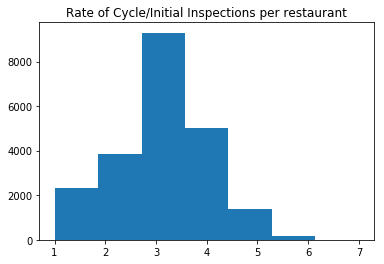

In [4]:
plt.hist(ins_count,bins=7,)
plt.title('Rate of Cycle/Initial Inspections per restaurant')

In [5]:
pd.Series(ins_count).value_counts()

3    9292
4    5008
2    3856
1    2317
5    1396
6     168
7       1
dtype: int64

In [6]:
df_init_sum=pd.DataFrame()
df_init_sum['CAMIS']=CAMIS
df_init_sum['ins_count']=ins_count
twice_ins=df_init_sum.loc[df_init_sum['ins_count']>=2]['CAMIS'].values
df_twice_init=df_init.loc[df_init['CAMIS'].isin(twice_ins)]

In [7]:
prev=[]
for cam,date in zip(df_twice_init['CAMIS'],df_twice_init['DATE']):
    if len(df_init.loc[(df_init['CAMIS']==cam)&(df_init['DATE']<date)]['SCORE'])>0:
        prev.append(df_init.loc[(df_init['CAMIS']==cam)&(df_init['DATE']<date)]['SCORE'].iloc[-1])
    else:
        prev.append(np.nan)
df_twice_init['prev_score']=prev   

C:\Users\kosta\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [8]:
df_twice_init[['SCORE','prev_score']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63615 entries, 0 to 65801
Data columns (total 2 columns):
SCORE         63615 non-null float64
prev_score    43894 non-null float64
dtypes: float64(2)
memory usage: 1.5 MB


In [9]:
df_twice_init.head()

,CAMIS,DATE,SCORE,INSPECTION TYPE,02A,02B,02C,02D,02E,02F,...,10E,10F,10G,10H,10I,10J,ACTION,CRITICAL FLAG,GRADE,prev_score
0,30075445,2017-05-18,7.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A,NaN
1,30075445,2018-05-11,5.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,0,A,7.0
2,30075445,2019-05-16,14.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,B,5.0
3,30112340,2016-10-03,48.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,3,C,NaN
4,30112340,2017-06-26,7.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A,48.0


In [10]:
df_twice_init.dropna(inplace=True)

C:\Users\kosta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


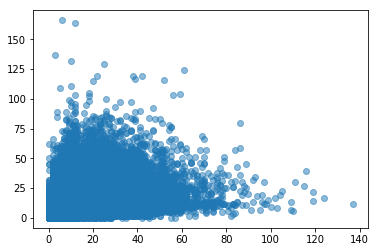

In [12]:
plt.scatter(df_twice_init['prev_score'],df_twice_init['SCORE'],alpha=0.5)

In [13]:
df_twice_init[['SCORE','prev_score']].corr()

,SCORE,prev_score
SCORE,1.000000,0.232972
prev_score,0.232972,1.000000


In [14]:
prev_crit=[]
for cam,date in zip(df_twice_init['CAMIS'],df_twice_init['DATE']):
    prev_crit.append(df_init.loc[(df_init['CAMIS']==cam)&(df_init['DATE']<date)]['CRITICAL FLAG'].iloc[-1])
df_twice_init['prev_critical']=prev_crit          
df_twice_init.head()

C:\Users\kosta\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,CAMIS,DATE,SCORE,INSPECTION TYPE,02A,02B,02C,02D,02E,02F,...,10F,10G,10H,10I,10J,ACTION,CRITICAL FLAG,GRADE,prev_score,prev_critical
1,30075445,2018-05-11,5.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,0,A,7.0,1
2,30075445,2019-05-16,14.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,B,5.0,0
4,30112340,2017-06-26,7.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A,48.0,3
5,30112340,2018-03-13,12.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A,7.0,1
6,30112340,2019-03-04,13.0,Cycle Inspection / Initial Inspection,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,Violations were cited in the following area(s).,1,A,12.0,1


In [15]:
df_twice_init[['CRITICAL FLAG','prev_critical']].corr()

,CRITICAL FLAG,prev_critical
CRITICAL FLAG,1.000000,0.266088
prev_critical,0.266088,1.000000


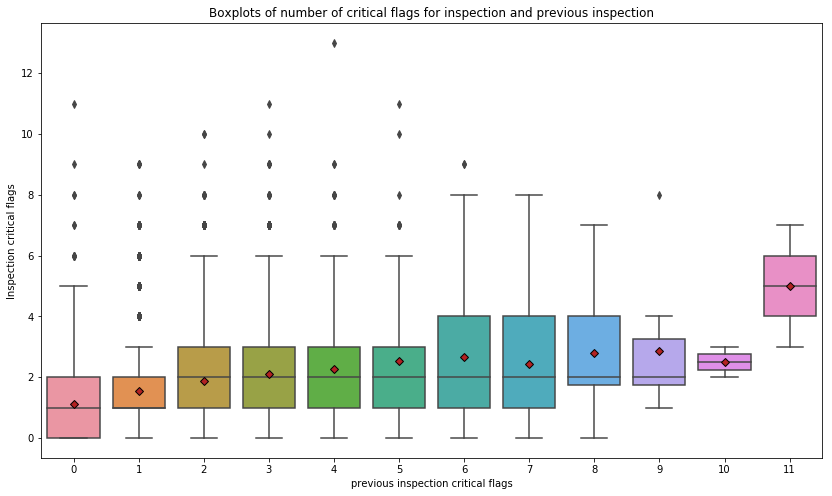

In [31]:
plt.figure(figsize=(14,8))
sns.boxplot(df_twice_init['prev_critical'],df_twice_init['CRITICAL FLAG'],showmeans=True,meanprops=dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick'))
plt.title('Boxplots of number of critical flags for inspection and previous inspection')
plt.ylabel('Inspection critical flags')
plt.xlabel('previous inspection critical flags')
plt.show()

In [24]:
df_twice_init.to_csv('twice_init.csv')